<a href="https://colab.research.google.com/github/JhonnyLimachi/IA_en_Salud/blob/main/13_Analisis_de_factor_de_riesgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FATORES DE RISCO PARA MORTALIDADE POR COVID-19 EM PACIENTES HOSPITALIZADOS NA BOLÍVIA**

INTRODUÇÃO

Desde sua emergência em 2019, o SARS-CoV-2 causou alta mortalidade em todo o mundo, com um impacto particularmente severo na América Latina, incluindo a Bolívia. A alta mortalidade foi exacerbada por fatores como comorbidades não diagnosticadas e desafios no sistema de saúde. Este estudo visa identificar os fatores associados ao risco de mortalidade em pacientes hospitalizados por COVID-19 na Bolívia, analisando características demográficas (idade e sexo), comorbidades (hipertensão, diabetes, doenças cardiovasculares), grupo sanguíneo e status vacinal. Além disso, busca entender como variáveis regionais, como a residência em áreas de altiplano, podem influenciar os desfechos clínicos.


In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
from google.colab import files
import pandas as pd
import io

# Subir el archivo Excel desde tu computadora
uploaded = files.upload()

# Get the first uploaded file's name and content
file_name = list(uploaded.keys())[0]
file_content = uploaded[file_name]

# Read the Excel file from the uploaded content using io.BytesIO
df = pd.read_excel(io.BytesIO(file_content))

# Ver las primeras filas del DataFrame
df.head()

Saving Base COVID COSSMIL CBBA ML.xlsx to Base COVID COSSMIL CBBA ML (2).xlsx


,N,SITUACION ACTUAL 0: VIVO 1: MUERTO,SEXO F:0 ; M:1,EDAD 0:<60 1:≥60,LUGAR NAC 0: NO ALTIPLANO 1: ALTIPLANO,GRUPO SANGRE 0: No A 1: A,EPOC \n1=SI\n0=NO;,ASMA\n1=SI\n0=NO,HTA\n0=NO\n1=SI,ENF. CARDIO VASCULAR\n0=NO\n1=SI,...,ENF. RENAL CRONICA 0=NO 1=SI,ENF. TIROIDE 0:NO 1=SI,OBESIDAD 0=NO 1=SI,DISLIPIDEMIA 0=NO SI=1,ENF. ARTICULAR 0=NO 1=SI,ENF. NEUROLOGICA 0=NO 1=SI,UTI COVID 0: NO 1: SI,CRITERIO INMUNE 0=NO; SI=1,DOSIS 0: NINGUNA 1: 1 DOSIS 2: ≥ 2 DOSIS,PREVAC 1:SI\n0:NO
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Verificar las primeras filas para inspeccionar los datos
df.head()

# Verificar las columnas y los tipos de datos
df.info()

# Verificar si hay valores nulos en las columnas
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 22 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   N                                                                549 non-null    int64
 1   SITUACION ACTUAL        0: VIVO     1: MUERTO                    549 non-null    int64
 2   SEXO  F:0 ;  M:1                                                 549 non-null    int64
 3   EDAD 0:<60 1:≥60                                                 549 non-null    int64
 4   LUGAR NAC     0: NO ALTIPLANO        1: ALTIPLANO                549 non-null    int64
 5   GRUPO SANGRE  0: No A   1: A                                     549 non-null    int64
 6   EPOC 
1=SI
0=NO;                                                 549 non-null    int64
 7   ASMA
1=SI
0=NO                                                

,0
N,0
SITUACION ACTUAL 0: VIVO 1: MUERTO,0
SEXO F:0 ; M:1,0
EDAD 0:<60 1:≥60,0
LUGAR NAC 0: NO ALTIPLANO 1: ALTIPLANO,0
GRUPO SANGRE 0: No A 1: A,0
EPOC \n1=SI\n0=NO;,0
ASMA\n1=SI\n0=NO,0
HTA\n0=NO\n1=SI,0
ENF. CARDIO VASCULAR\n0=NO\n1=SI,0


In [ ]:
df = df.dropna()  # Elimina las filas con valores nulos

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
# Convertir variables categóricas en variables dummy (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

# Verificar el DataFrame después de la conversión
df.head()

,N,SITUACION ACTUAL 0: VIVO 1: MUERTO,SEXO F:0 ; M:1,EDAD 0:<60 1:≥60,LUGAR NAC 0: NO ALTIPLANO 1: ALTIPLANO,GRUPO SANGRE 0: No A 1: A,EPOC \n1=SI\n0=NO;,ASMA\n1=SI\n0=NO,HTA\n0=NO\n1=SI,ENF. CARDIO VASCULAR\n0=NO\n1=SI,...,ENF. RENAL CRONICA 0=NO 1=SI,ENF. TIROIDE 0:NO 1=SI,OBESIDAD 0=NO 1=SI,DISLIPIDEMIA 0=NO SI=1,ENF. ARTICULAR 0=NO 1=SI,ENF. NEUROLOGICA 0=NO 1=SI,UTI COVID 0: NO 1: SI,CRITERIO INMUNE 0=NO; SI=1,DOSIS 0: NINGUNA 1: 1 DOSIS 2: ≥ 2 DOSIS,PREVAC 1:SI\n0:NO
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Print the column names of your DataFrame to identify the correct target column name
print(df.columns)

# Replace 'actual_target_column_name' with the actual name of your target column from the printed list
# The column name may have changed after get_dummies(), check the printed column names
target_column_name = 'SITUACION ACTUAL'  # Update if necessary based on the printed column list
# Check if the target column name exists before dropping
if target_column_name in df.columns:
    X = df.drop(target_column_name, axis=1)
else:
    print(f"Column '{target_column_name}' not found in DataFrame. Check the column names.")

Index(['N', 'SITUACION ACTUAL        0: VIVO     1: MUERTO',
       'SEXO  F:0 ;  M:1  ', 'EDAD 0:<60 1:≥60',
       'LUGAR NAC     0: NO ALTIPLANO        1: ALTIPLANO',
       'GRUPO SANGRE  0: No A   1: A ', 'EPOC \n1=SI\n0=NO; ',
       'ASMA\n1=SI\n0=NO ', 'HTA\n0=NO\n1=SI',
       'ENF. CARDIO VASCULAR\n0=NO\n1=SI', 'DIABETES\n0=NO\n1=SI',
       'CANCER\n0=NO\n1=SI', 'ENF. RENAL CRONICA 0=NO   1=SI',
       'ENF. TIROIDE          0:NO    1=SI', 'OBESIDAD 0=NO      1=SI',
       'DISLIPIDEMIA     0=NO         SI=1',
       'ENF. ARTICULAR  0=NO         1=SI',
       'ENF. NEUROLOGICA  0=NO        1=SI', 'UTI COVID  0: NO   1: SI',
       'CRITERIO INMUNE         0=NO; SI=1',
       'DOSIS             0: NINGUNA   1: 1  DOSIS         2: ≥ 2 DOSIS',
       'PREVAC         1:SI\n0:NO'],
      dtype='object')
Column 'SITUACION ACTUAL' not found in DataFrame. Check the column names.


In [ ]:
# Separar las características (X) y la variable dependiente (y)
# Assuming 'SITUACION ACTUAL' was one-hot encoded, find the related columns
target_columns = [col for col in df.columns if 'SITUACION ACTUAL' in col]

# If 'SITUACION ACTUAL' was not one-hot encoded and still exists, use it
if not target_columns and 'SITUACION ACTUAL' in df.columns:
    target_columns = ['SITUACION ACTUAL']

# Drop the target columns from the features (X)
X = df.drop(columns=target_columns, axis=1)
y = df[target_columns]  # La variable dependiente (One-hot encoded 'SITUACION ACTUAL' or original)

# Verificar que la separación se hizo correctamente
print(f"Características (X):\n{X.head()}")
print(f"Variable dependiente (y):\n{y.head()}")


Características (X):
   N  SEXO  F:0 ;  M:1    EDAD 0:<60 1:≥60  \
0  1                   1                 0   
1  2                   0                 0   
2  3                   1                 1   
3  4                   0                 1   
4  5                   0                 1   

   LUGAR NAC     0: NO ALTIPLANO        1: ALTIPLANO  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  1   
4                                                  1   

   GRUPO SANGRE  0: No A   1: A   EPOC \n1=SI\n0=NO;   ASMA\n1=SI\n0=NO   \
0                              0                    0                  0   
1                              1                    0                  0   
2                              0                    0                  0   
3                              0                    0        

In [ ]:
print(X.isnull().sum())
print(y.isnull().sum())

N                                                                  0
SEXO  F:0 ;  M:1                                                   0
EDAD 0:<60 1:≥60                                                   0
LUGAR NAC     0: NO ALTIPLANO        1: ALTIPLANO                  0
GRUPO SANGRE  0: No A   1: A                                       0
EPOC \n1=SI\n0=NO;                                                 0
ASMA\n1=SI\n0=NO                                                   0
HTA\n0=NO\n1=SI                                                    0
ENF. CARDIO VASCULAR\n0=NO\n1=SI                                   0
DIABETES\n0=NO\n1=SI                                               0
CANCER\n0=NO\n1=SI                                                 0
ENF. RENAL CRONICA 0=NO   1=SI                                     0
ENF. TIROIDE          0:NO    1=SI                                 0
OBESIDAD 0=NO      1=SI                                            0
DISLIPIDEMIA     0=NO         SI=1

In [ ]:
X.fillna(X.mean(), inplace=True)  # Imputar valores nulos con la media

In [ ]:
X.fillna(X.mean(), inplace=True)  # Imputar valores nulos con la media

In [ ]:
X.fillna(X.mean(), inplace=True)  # Imputar valores nulos con la media

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

Conjunto de entrenamiento: (439, 21), (439, 1)
Conjunto de prueba: (110, 21), (110, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva (1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Calcular métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.7363636363636363
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.93      0.83        74
           1       0.71      0.33      0.45        36

    accuracy                           0.74       110
   macro avg       0.72      0.63      0.64       110
weighted avg       0.73      0.74      0.70       110

ROC-AUC: 0.8292042042042042


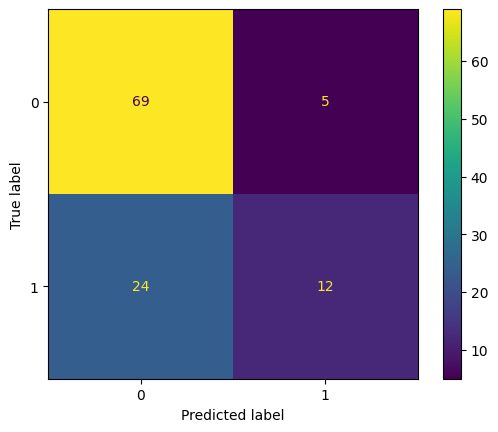

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
import pandas as pd

# Assuming 'df' is your original DataFrame before scaling
# 'original_df' was not defined, so we're using 'df' instead
coef_df = pd.DataFrame({
    'Variable': df.drop(columns=target_columns, axis=1).columns,  # Use original DataFrame's columns
    'Coeficiente': model.coef_[0]
})
print(coef_df.sort_values(by='Coeficiente', ascending=False))

                                             Variable  Coeficiente
17                           UTI COVID  0: NO   1: SI     0.934539
2                                    EDAD 0:<60 1:≥60     0.735505
14                 DISLIPIDEMIA     0=NO         SI=1     0.359878
7                                     HTA\n0=NO\n1=SI     0.298999
5                                 EPOC \n1=SI\n0=NO;      0.197233
4                       GRUPO SANGRE  0: No A   1: A      0.186963
1                                  SEXO  F:0 ;  M:1       0.104580
11                     ENF. RENAL CRONICA 0=NO   1=SI     0.095362
3   LUGAR NAC     0: NO ALTIPLANO        1: ALTIPLANO     0.065455
6                                   ASMA\n1=SI\n0=NO      0.042329
13                            OBESIDAD 0=NO      1=SI    -0.009149
16                 ENF. NEUROLOGICA  0=NO        1=SI    -0.020100
10                                 CANCER\n0=NO\n1=SI    -0.060047
18                 CRITERIO INMUNE         0=NO; SI=1    -0.06

In [ ]:
threshold = 0.3  # Cambia el umbral
y_pred_adjusted = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

In [ ]:
import joblib

joblib.dump(model, 'logistic_regression_model.pkl')  # Guardar modelo
# Cargar modelo
model_loaded = joblib.load('logistic_regression_model.pkl')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
model = grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mejores parámetros: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predecir las probabilidades
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Ajustar el umbral (por ejemplo, a 0.3)
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluar el modelo con el nuevo umbral
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusión con umbral ajustado:")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_adjusted))

Matriz de confusión con umbral ajustado:
[[60 14]
 [11 25]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        74
           1       0.64      0.69      0.67        36

    accuracy                           0.77       110
   macro avg       0.74      0.75      0.75       110
weighted avg       0.78      0.77      0.77       110



In [ ]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Reevaluar el desempeño
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        74
           1       0.60      0.75      0.67        36

    accuracy                           0.75       110
   macro avg       0.73      0.75      0.74       110
weighted avg       0.78      0.75      0.76       110



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con los datos balanceados
model.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
from xgboost import XGBClassifier

# Assuming 'SITUACION ACTUAL_Muerte' is your target column for 'Muerte' class
# Replace with the actual column name if different
# Check the column names of y_train after get_dummies() to confirm
target_column = 'SITUACION ACTUAL_Muerte'

# Check if the target column exists in y_train
if target_column in y_train.columns:
    # Calculate scale_pos_weight based on the target column
    scale_pos_weight = len(y_train) / y_train[target_column].sum()

    model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
    model.fit(X_train, y_train)
else:
    print(f"Error: Target column '{target_column}' not found in y_train. Check column names.")

Error: Target column 'SITUACION ACTUAL_Muerte' not found in y_train. Check column names.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, scoring='recall', cv=5)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mejores parámetros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
# Paso 1: Predecir probabilidades para la clase 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Paso 2: Ajustar el umbral
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Paso 3: Evaluar el modelo con el nuevo umbral
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusión con umbral ajustado:")
print(confusion_matrix(y_test, y_pred_adjusted))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_adjusted))

Matriz de confusión con umbral ajustado:
[[40 34]
 [ 5 31]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.54      0.67        74
           1       0.48      0.86      0.61        36

    accuracy                           0.65       110
   macro avg       0.68      0.70      0.64       110
weighted avg       0.75      0.65      0.65       110



In [ ]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Reevaluar el desempeño
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        74
           1       0.60      0.75      0.67        36

    accuracy                           0.75       110
   macro avg       0.73      0.75      0.74       110
weighted avg       0.78      0.75      0.76       110



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# Paso 1: Balancear las clases con SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Paso 2: Entrenar el modelo con los datos balanceados
model.fit(X_train_balanced, y_train_balanced)

# Paso 3: Realizar predicciones con el modelo ajustado
y_pred = model.predict(X_test)

# Paso 4: Evaluar el modelo
print("Matriz de confusión (SMOTE aplicado):")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión (SMOTE aplicado):
[[54 20]
 [10 26]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        74
           1       0.57      0.72      0.63        36

    accuracy                           0.73       110
   macro avg       0.70      0.73      0.71       110
weighted avg       0.75      0.73      0.73       110



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Paso 1: Calcular el peso para la clase 1
# Assuming 'SITUACION ACTUAL_Muerte' is your target column for 'Muerte' class
# Replace with the actual column name if different
# Check the column names of y_train after get_dummies() to confirm
target_column = 'SITUACION ACTUAL_Muerte'

# Check if the target column exists in y_train
if target_column in y_train.columns:
    # Calculate scale_pos_weight based on the target column
    scale_pos_weight = len(y_train) / y_train[target_column].sum()

    # Paso 2: Entrenar el modelo XGBoost
    xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
    xgb_model.fit(X_train, y_train)
else:
    print(f"Error: Target column '{target_column}' not found in y_train. Check column names.")
    # Initialize xgb_model to avoid the NameError
    xgb_model = None  # or any suitable default value/model

# Paso 3: Realizar predicciones y evaluar
# Check if xgb_model was successfully created before using it
if xgb_model is not None:
    y_pred = xgb_model.predict(X_test)
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

    print("Matriz de confusión (XGBoost):")
    print(confusion_matrix(y_test, y_pred))

    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

Error: Target column 'SITUACION ACTUAL_Muerte' not found in y_train. Check column names.
